In [3]:
#K nearest neighbours is a classificaiton algorithm 
#It allows us to classify the next point on the basis where the current point lies
#Training Algo
        # 1. Simply plot the points on the graph
#Prediction Algo
        # 1. Calculate the dist from x to all points in your data
        # 2. Sort the points in data by increasing order of x
        # 3. Predict the majority label of the 'k' closest points 
#we consider k here to be the distance from the new point
# chosing the value of k will significantly decide the class of our new point

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df=pd.read_csv('CSV/Classified Data-Copy1',index_col=0)
df.head() #given is classified data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [12]:
from sklearn.preprocessing import StandardScaler #StandardScaler is used to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1

In [13]:
scaler=StandardScaler()

In [15]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [17]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))#actually transforms the data 

In [18]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [19]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [22]:
df_feat.head() #final standardised data . It's good to do this before running it through any of the ML Models
                #Since KNN is based on dist, standardisation is quite important

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X=df_feat
y=df['TARGET CLASS']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=1)#n_neighbors is basically a the k value for our data

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
pred=knn.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [38]:
pd.DataFrame(classification_report(pred,y_test,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.949686,0.893617,0.923333,0.921651,0.924642
recall,0.909639,0.940299,0.923333,0.924969,0.923333
f1-score,0.929231,0.916364,0.923333,0.922797,0.923483
support,166.000000,134.000000,0.923333,300.000000,300.000000


In [39]:
pd.DataFrame(confusion_matrix(pred,y_test))

,0,1
0,151,15
1,8,126


In [51]:
#To find the error rate for the nearest classifications 
error_rate=[]
for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))


Text(0, 0.5, 'Error Rate')

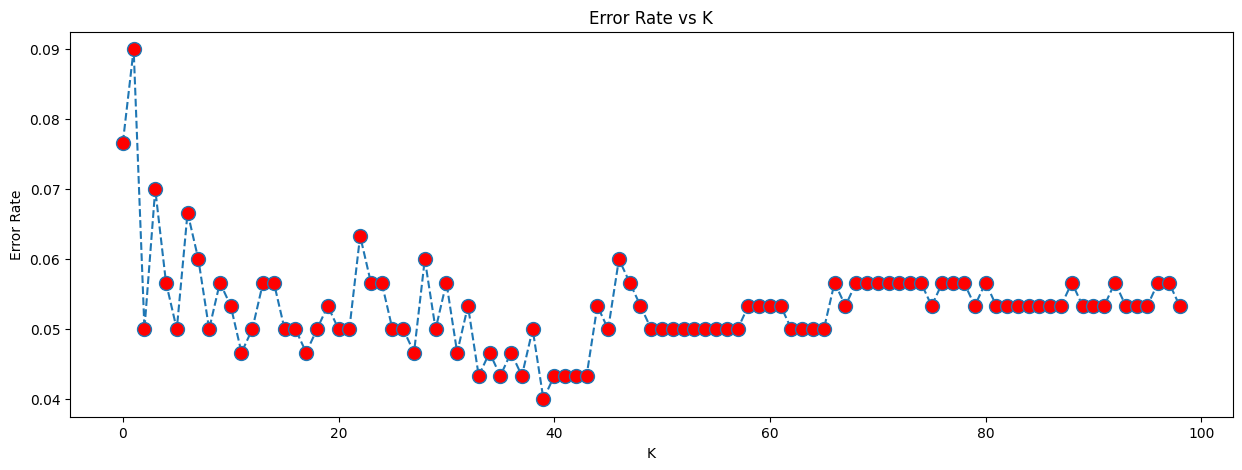

In [53]:
plt.figure(figsize=(15,5))
plt.plot(error_rate,linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#above the min K value is around 40 approx 39 so final metrics with respect to k = 39

In [59]:
knn=KNeighborsClassifier(n_neighbors=39)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [61]:
pred=knn.predict(X_test)

In [67]:
pd.DataFrame(classification_report(y_test,pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.955696,0.943662,0.95,0.949679,0.950040
recall,0.949686,0.950355,0.95,0.950020,0.950000
f1-score,0.952681,0.946996,0.95,0.949839,0.950009
support,159.000000,141.000000,0.95,300.000000,300.000000


In [68]:
pd.DataFrame(classification_report(pred,y_test,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.949686,0.950355,0.95,0.950020,0.950002
recall,0.955696,0.943662,0.95,0.949679,0.950000
f1-score,0.952681,0.946996,0.95,0.949839,0.949991
support,158.000000,142.000000,0.95,300.000000,300.000000


In [66]:
pd.DataFrame(confusion_matrix(pred,y_test))

,0,1
0,151,7
1,8,134
